In [23]:
import numpy as np
import matplotlib.pyplot as plt

def omp(X, y, nonneg=True, nsoltncoef=None, maxit=200, tol=1e-3):

    # by default set max number of soltncoef to half of total possible
    if nsoltncoef is None:
        nsoltncoef = int(X.shape[1]/2)
    
    ############# initialize things # algorithm step 0(Input) ############
    X_transpose = X.T                       
    nonzerosoltncoef = []
    soltncoef = np.zeros(X.shape[1], dtype=float) 
    residual = y                           
    ypred = np.zeros(y.shape, dtype=float)
    err = np.zeros(maxit, dtype=float)      
   
    ############ main iteration # algorithm step 1 #############
    for it in range(maxit):
        # compute residual covariance vector and check threshold
        rcov = np.dot(X_transpose, residual)
        # algorithm step 3 choose i to maximize step2
        if nonneg:
            i = np.argmax(rcov)
            rc = rcov[i]
        else:
            i = np.argmax(np.abs(rcov))
            rc = np.abs(rcov[i])
        
        # algorithm step 2 (nonzero components)
        if i not in nonzerosoltncoef:
            nonzerosoltncoef.append(i)

        # algorithm step 2( least squares)
        soltncoefi, _, _, _ = np.linalg.lstsq(X[:, nonzerosoltncoef], y)
        soltncoef[nonzerosoltncoef] = soltncoefi   # update solution
        
        ######## algorithm step 3 ########
        residual = y - np.dot(X[:,nonzerosoltncoef], soltncoefi)
        ypred = y - residual
        
        ######### check stopping criteria # algorithm step 4 ########
        err[it] =  np.linalg.norm(residual)**2 
        if err[it] < tol:  # converged
            print('\nConverged at',it)
            break
        if len(nonzerosoltncoef) >= nsoltncoef:   # hit max soltncoefficients
            print('\nFound solution with max number of soltncoefficients.')
            break
        if it == maxit-1:  # max iterations
            print('\nreached the max number of iterations.')
    return soltncoef, nonzerosoltncoef, err[:(it+1)], residual, ypred

if __name__ == '__main__':
    pass

###Generate synthetic data

In [24]:
# generate a grid
npts = 64
domain = np.linspace(0, 1, npts)

# generate a dictionary and manufactured solution
X = np.array([np.cos(2 * np.pi * m * domain) for m in range(4)]).T
soltncoef = [0., 1., 0., .5]
y = np.dot(X, soltncoef)

Text(0.5, 1.0, 'inputs')

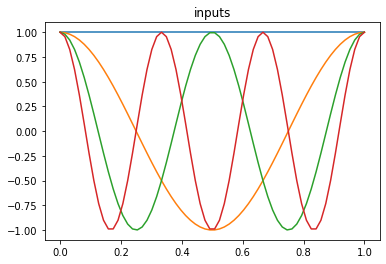

In [25]:
plt.plot(domain, X)
plt.title('inputs')

Text(0.5, 1.0, 'Response')

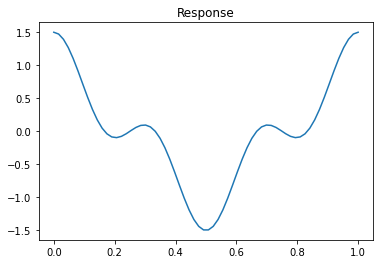

In [26]:
plt.plot(domain, y)
plt.title('Response')

###Non-negative reconstruction

In [35]:
# reconstruct
soltncoef, nonzerosoltncoef, err, residual, ypred = omp(X, y)
# print('Solution: %r' % result.soltncoef)


Converged at 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5, 1.0, 'Predicted and true responses')

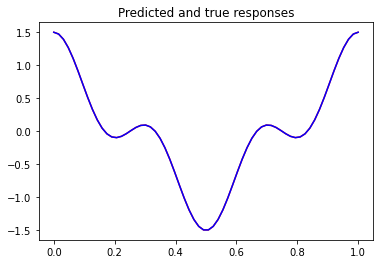

In [36]:
plt.plot(domain, y,'r')
plt.plot(domain, ypred,'b')
plt.title('Predicted and true responses')

###Non-negative reconstruction that "fails"

In [39]:
soltncoef2 = [0., 1., 0., -0.5]
y2 = np.dot(X, soltncoef2)

soltncoef, nonzerosoltncoef, err, residual, ypred  = omp(X, y2)
print('Solution is ',soltncoef)


reached the max number of iterations.
Solution is  [0.         0.98461538 0.         0.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5, 1.0, 'Predicted and true responses')

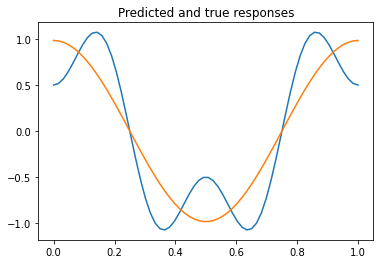

In [40]:
plt.plot(domain, y2)
plt.plot(domain, ypred)
plt.title('Predicted and true responses')

Non-negative reconstruction that works when using OMP

In [37]:
#soltncoef2 = [0., 1., 0., -0.5]
y2 = np.dot(X, soltncoef)

soltncoef, nonzerosoltncoef, err, residual, ypred  = omp(X, y2)
print('Solution is ',soltncoef)


Converged at 1
Solution is  [0.  1.  0.  0.5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5, 1.0, 'Predicted and true responses')

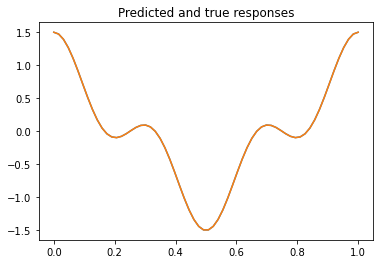

In [38]:
plt.plot(domain, y2)
plt.plot(domain, ypred)
plt.title('Predicted and true responses')

###Unconstrained reconstruction 

In [31]:
soltncoef, nonzerosoltncoef, err, residual, ypred  = omp(X, y2, nonneg=False)
print('Solution', soltncoef)


Converged at 1
Solution [ 0.   1.   0.  -0.5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5, 1.0, 'Predicted and true responses')

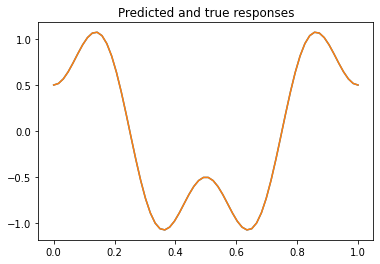

In [32]:
plt.plot(domain, y2)
plt.plot(domain, ypred)
plt.title('Predicted and true responses')